In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# <h1><center>Impatto della mastectomia</center></h1>

<h3><center>1. Info preliminari</center></h3>
</br>Il dataset proviene da METABRIC. Dati raccolti dal professor Carlos Caldas e dal professor Sam Aparicio pubblicato su Nature Communications (Pereira et al., 2016)

In [2]:
lista_terapie = []

for nome_file in os.listdir('Terapie'):
    percorso_file = os.path.join('Terapie', nome_file)
    df = pd.read_pickle(percorso_file)
    df = df.reset_index(drop=True)
    lista_terapie.append(df)

In [3]:
df_età = lista_terapie[7].copy()
lista_terapie.pop(7)

,age_at_diagnosis,overall_survival_months,death_from_cancer,tumor_size,tumor_stage,type_of_breast_surgery,COR_Terapie,Terapie
0,75.65,140.50,Living,22.0,2.0,MASTECTOMY,"(0, 1, 1)",radio + ormone
1,43.19,84.63,Living,10.0,1.0,BREAST CONSERVING,"(0, 1, 1)",radio + ormone
2,48.87,163.70,Died of Disease,15.0,2.0,MASTECTOMY,"(1, 1, 0)",chemio + ormone
3,47.68,164.93,Living,25.0,2.0,MASTECTOMY,"(1, 1, 1)",tutte
4,76.97,41.37,Died of Disease,40.0,2.0,MASTECTOMY,"(1, 1, 1)",tutte
...,...,...,...,...,...,...,...,...
1076,75.33,0.10,Died of Disease,15.0,1.0,MASTECTOMY,"(0, 0, 0)",nessuna
1077,70.65,201.17,Living,20.0,1.0,BREAST CONSERVING,"(0, 0, 1)",radio
1078,52.84,200.33,Living,20.0,2.0,BREAST CONSERVING,"(1, 0, 1)",chemio + radio
1079,48.59,14.70,Died of Disease,30.0,2.0,MASTECTOMY,"(1, 0, 1)",chemio + radio


In [4]:
df_nuovo = lista_terapie[7].copy()
lista_terapie.pop(8)

,Cura,Media,Minimo,Massimo,Mediana
0,radio + ormone,148.45,2.00,318.20,144.44
1,radio,202.80,34.10,307.93,200.88
2,tutte,130.00,13.40,259.93,130.99
3,chemio,175.49,25.03,278.27,180.06
4,nessuna,190.01,1.23,337.03,205.73
5,ormone,159.26,1.27,300.87,163.40
6,chemio + radio,173.68,10.83,322.83,186.90
7,chemio + ormone,133.72,72.67,194.20,140.55


In [5]:
df_statistiche = lista_terapie[7].copy()
lista_terapie.pop(7)

,age_at_diagnosis,overall_survival_months,death_from_cancer,tumor_size,COR_Terapie,Terapie,Operation_Stage
0,56.79,44.83,Died of Disease,16.0,"(0, 1, 1)",radio + ormone,BREAST CONSERVING 1.0
1,76.06,198.30,Living,20.0,"(0, 0, 1)",radio,BREAST CONSERVING 1.0
2,60.96,14.17,Died of Disease,18.0,"(0, 0, 1)",radio,BREAST CONSERVING 1.0
3,61.78,163.73,Living,15.0,"(0, 0, 1)",radio,BREAST CONSERVING 1.0
4,55.53,190.17,Living,15.0,"(0, 0, 1)",radio,BREAST CONSERVING 1.0
...,...,...,...,...,...,...,...
1060,57.79,9.07,Died of Disease,48.0,"(1, 1, 1)",tutte,MASTECTOMY 4.0
1061,78.77,7.80,Died of Disease,31.0,"(0, 1, 1)",radio + ormone,MASTECTOMY 4.0
1062,73.24,89.90,Died of Disease,67.0,"(0, 0, 0)",nessuna,MASTECTOMY 4.0
1063,67.46,48.53,Died of Disease,25.0,"(1, 1, 0)",chemio + ormone,MASTECTOMY 4.0


In [6]:
sns.set(font_scale = 2, style='whitegrid')
sns.set_context("talk")

<h3><center>2. Motivazione</center></h3>

<p>Il cancro colpisce <b>2,1 milioni di donne ogni anno</b>.
    Solo nel 2018, si stima che <b>627.000</b> donne siano morte di cancro al seno.</p>

<h5><center><b>Analisi preliminare del dataset:</b></center></h5>
<body>
    <table border="1">
        <tr>
            <td><b>Stadio tumore</b></td><td><b>Percentuale</b></td>
        </tr>
        <tr>
            <td>0</td><td>0,28%</td>
        </tr>
        <tr>
            <td>1</td><td>33.86%</td>
        </tr>
        <tr>
            <td>2</td><td>57.02%</td>
        </tr>
        <tr>
            <td>3</td><td>8.20%</td>
        </tr>
        <tr>
            <td>4</td><td>0.64%</td>
        </tr>
    </table>
</body>

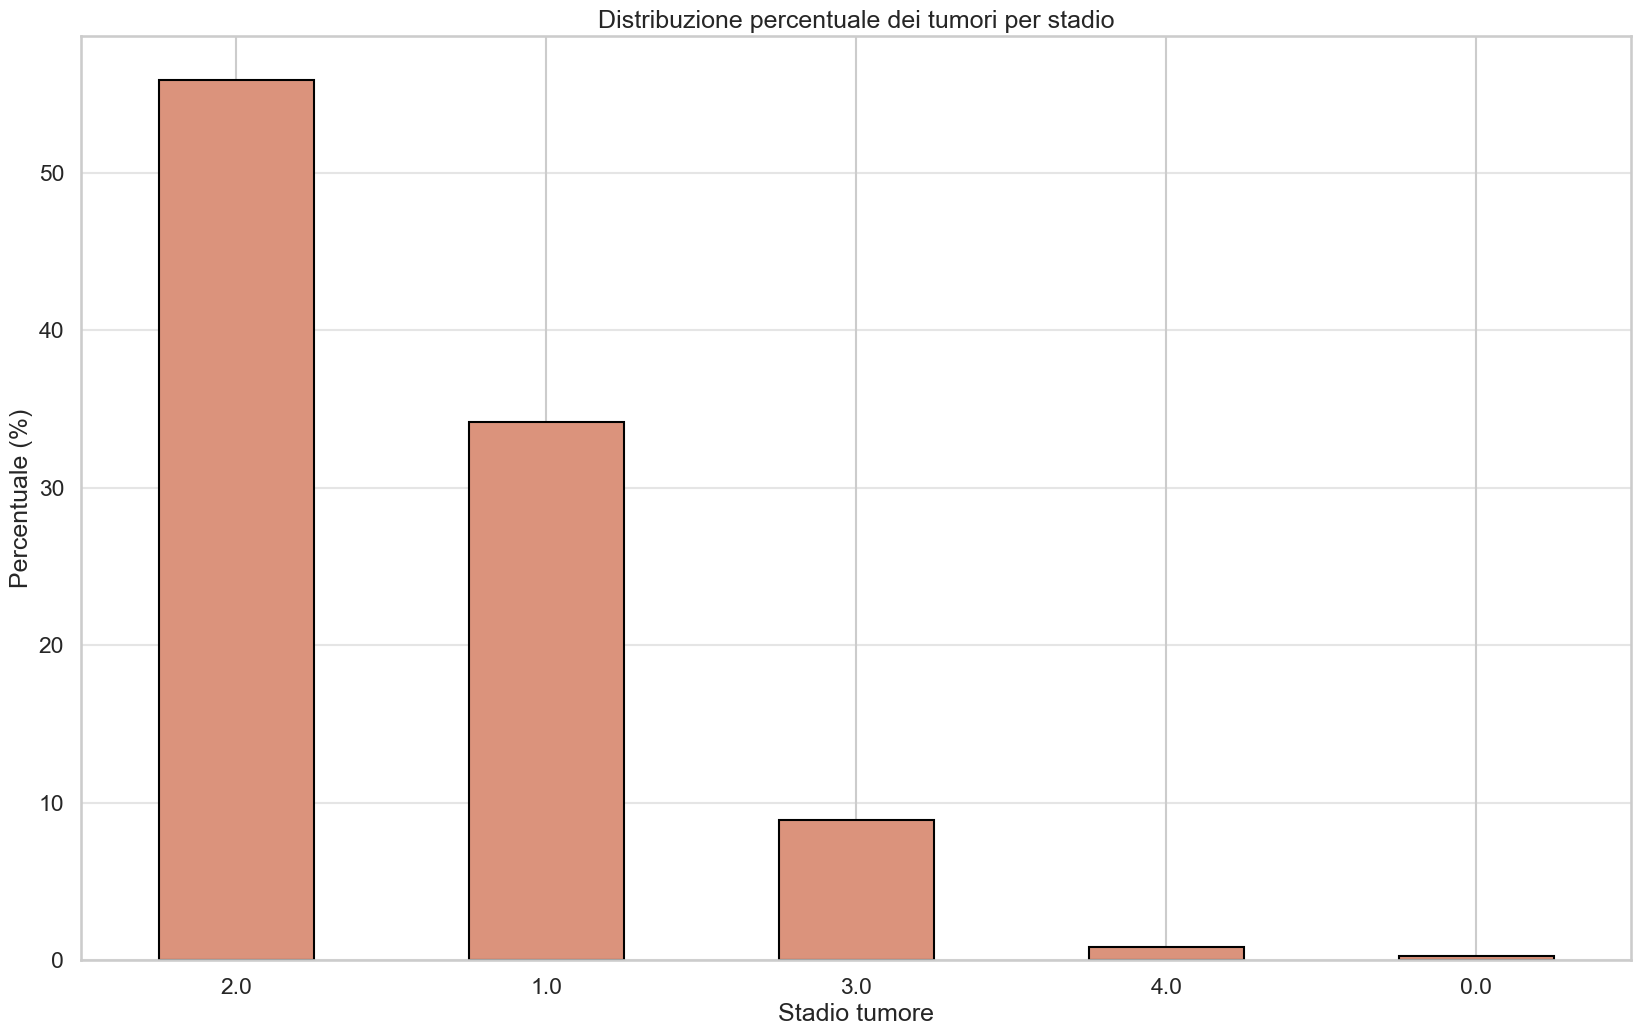

In [7]:
# Calcolo delle percentuali
percentuali = df_età['tumor_stage'].value_counts(normalize=True) * 100

plt.figure(figsize=(20, 12))
percentuali.plot(kind='bar', color='#db937c', edgecolor='black')

plt.title('Distribuzione percentuale dei tumori per stadio')
plt.xlabel('Stadio tumore')
plt.ylabel('Percentuale (%)')
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.5)

plt.show()

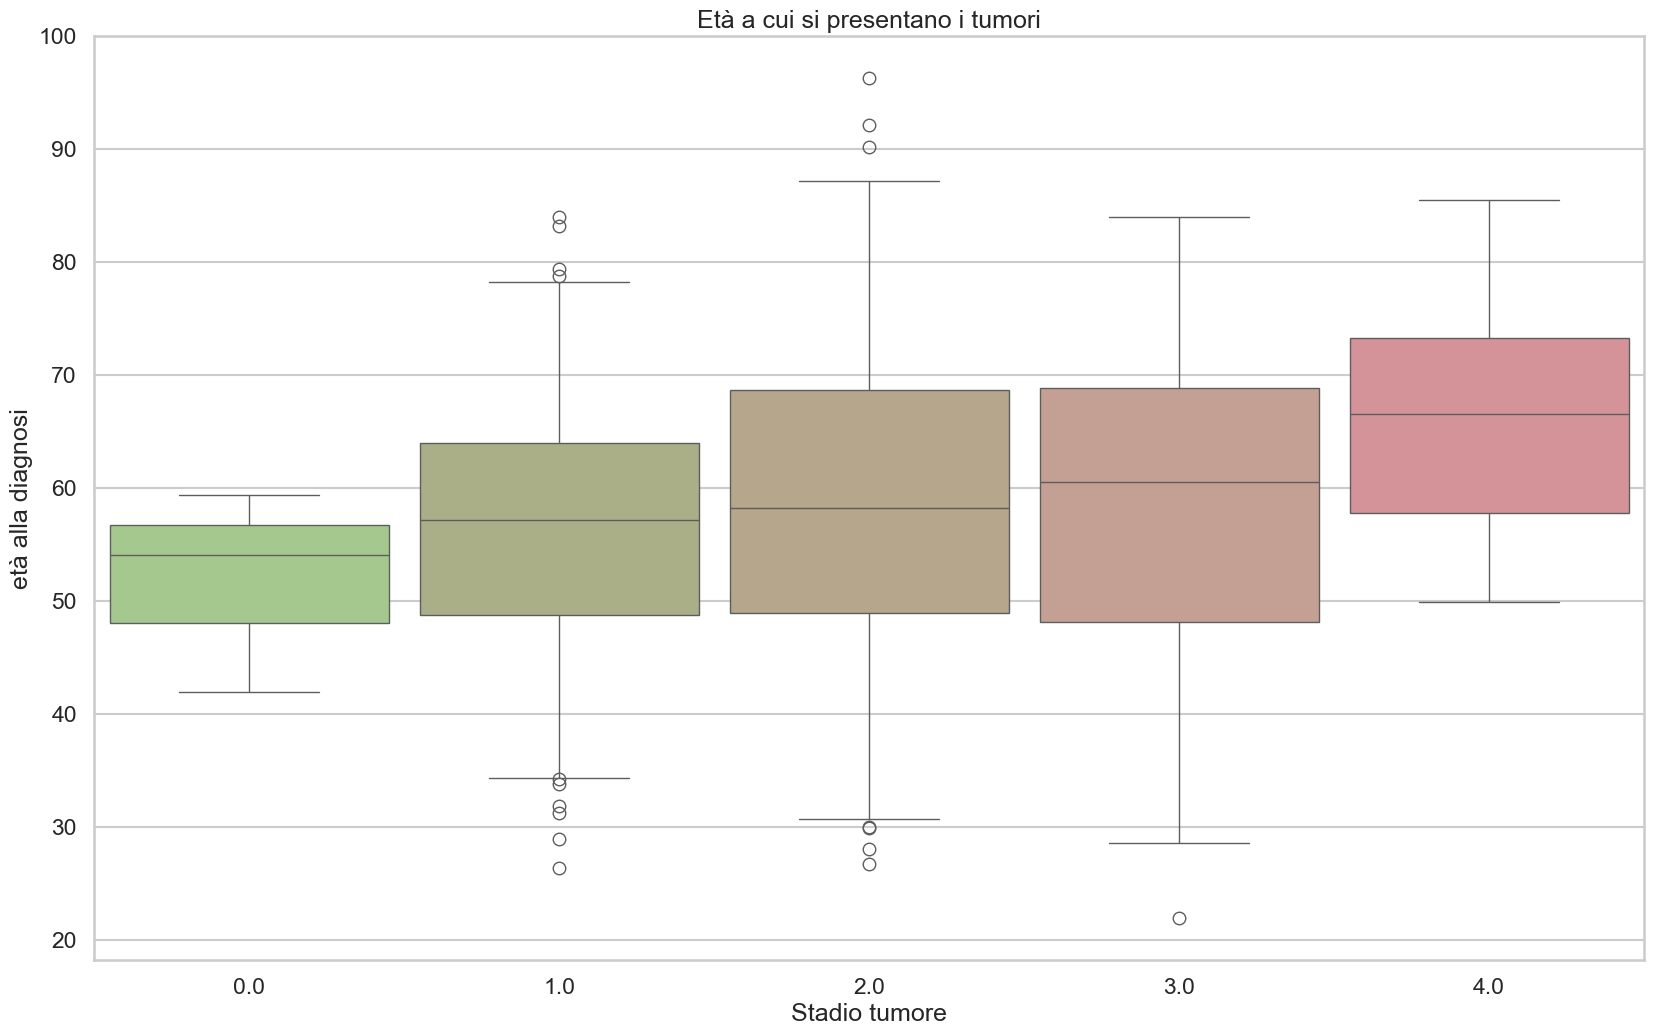

In [8]:
# Fare boxplot su df_età prendendo lo stadio tumorale e l'età
color = ['#9de66f', '#b8c275', '#c9ab78', '#db937c', '#f27480']

quartiles = df_età.groupby("tumor_stage")["age_at_diagnosis"].describe()[["25%", "50%", "75%"]]

plt.figure(figsize=(20, 12))
a = sns.boxplot(data=df_età, x='tumor_stage', y='age_at_diagnosis', hue='tumor_stage', legend=False, palette=color,
                saturation=0.5, width=1, gap=.1, whis=0.95)
plt.title(f'Età a cui si presentano i tumori')
a.set_xlabel('Stadio tumore')
a.set_ylabel('età alla diagnosi')

plt.show()

In [9]:
def crea_grafico(tasso_sopravvivenza, titolo, n, m):
    terapia = tasso_sopravvivenza['Terapia']
    vivi = tasso_sopravvivenza['Percentuale(v/m)'].apply(lambda y: y[0])
    morti = tasso_sopravvivenza['Percentuale(v/m)'].apply(lambda y: y[1])
    
    plt.figure(figsize=(30, 18))
    x_pos = np.arange(len(terapia))
    
    plt.bar(x_pos - 0.1, vivi, width=0.1, color='#9de66f', label='Percentuale pazienti vivi')
    plt.bar(x_pos + 0.1, morti, width=0.1, color='#f27480', label='Percentuale pazienti deceduti')
    
    for i in range(len(terapia)):
        plt.text(x_pos[i] - 0.1, vivi[i], f'count: {n[i]}', ha='center', va='bottom', fontweight='bold')
        plt.text(x_pos[i] + 0.1, morti[i] + 1, f'count: {m[i]}', ha='center', va='bottom', fontweight='bold')
    
    plt.xlabel('Categoria')
    plt.ylabel('Percentuale')
    plt.xticks(x_pos, terapia)
    plt.legend()
    plt.title(titolo)

<h3><center><b>L'età influisce sulla possibilità di sopravvivenza?</b></center></h3>

Grafico di densità




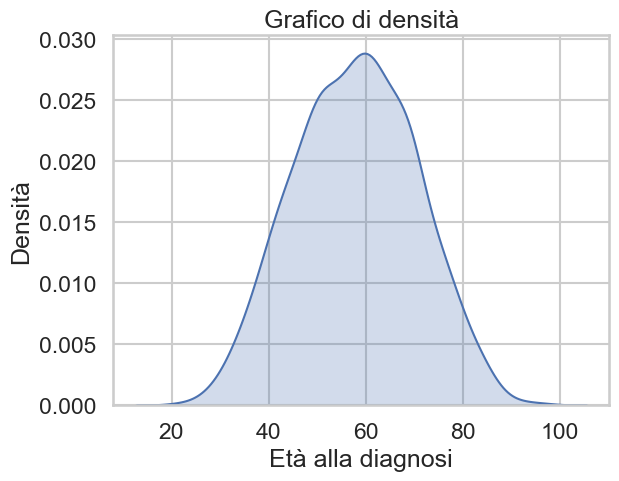

L'età media dei pazienti affetti da cancro al seno è di: 57.9 anni


In [10]:
print('Grafico di densità')
print('\n')
b = sns.kdeplot(df_nuovo, x=df_nuovo.columns[0], fill=True)
plt.title(f'Grafico di densità')
b.set_xlabel('Età alla diagnosi')
b.set_ylabel('Densità')
plt.show()
media = (df_nuovo['age_at_diagnosis'].mean()).round(2)
print(f'L\'età media dei pazienti affetti da cancro al seno è di: {media} anni')

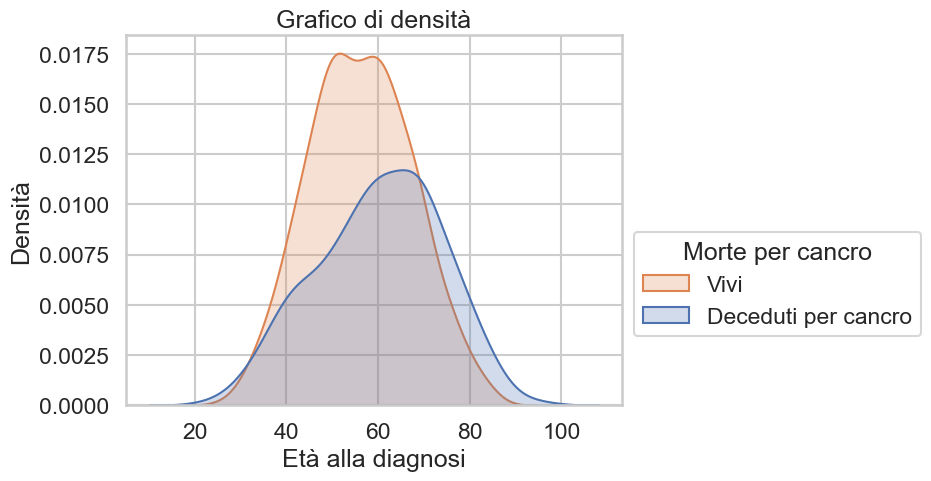

In [11]:
c = sns.kdeplot(df_nuovo, x=df_nuovo.columns[0], hue="death_from_cancer", fill=True)
plt.title(f'Grafico di densità')
plt.legend(title="Morte per cancro", labels=['Vivi', 'Deceduti per cancro'], bbox_to_anchor=(1, 0.5))
c.set_xlabel('Età alla diagnosi')
c.set_ylabel('Densità')
plt.show()

Notiamo che l'età non influisce. Ci sono pazienti deceduti anche intorno ai 20 anni.


<center><b>Le terapie e la mastectomia influiscono sulla mortalità?</b></center>

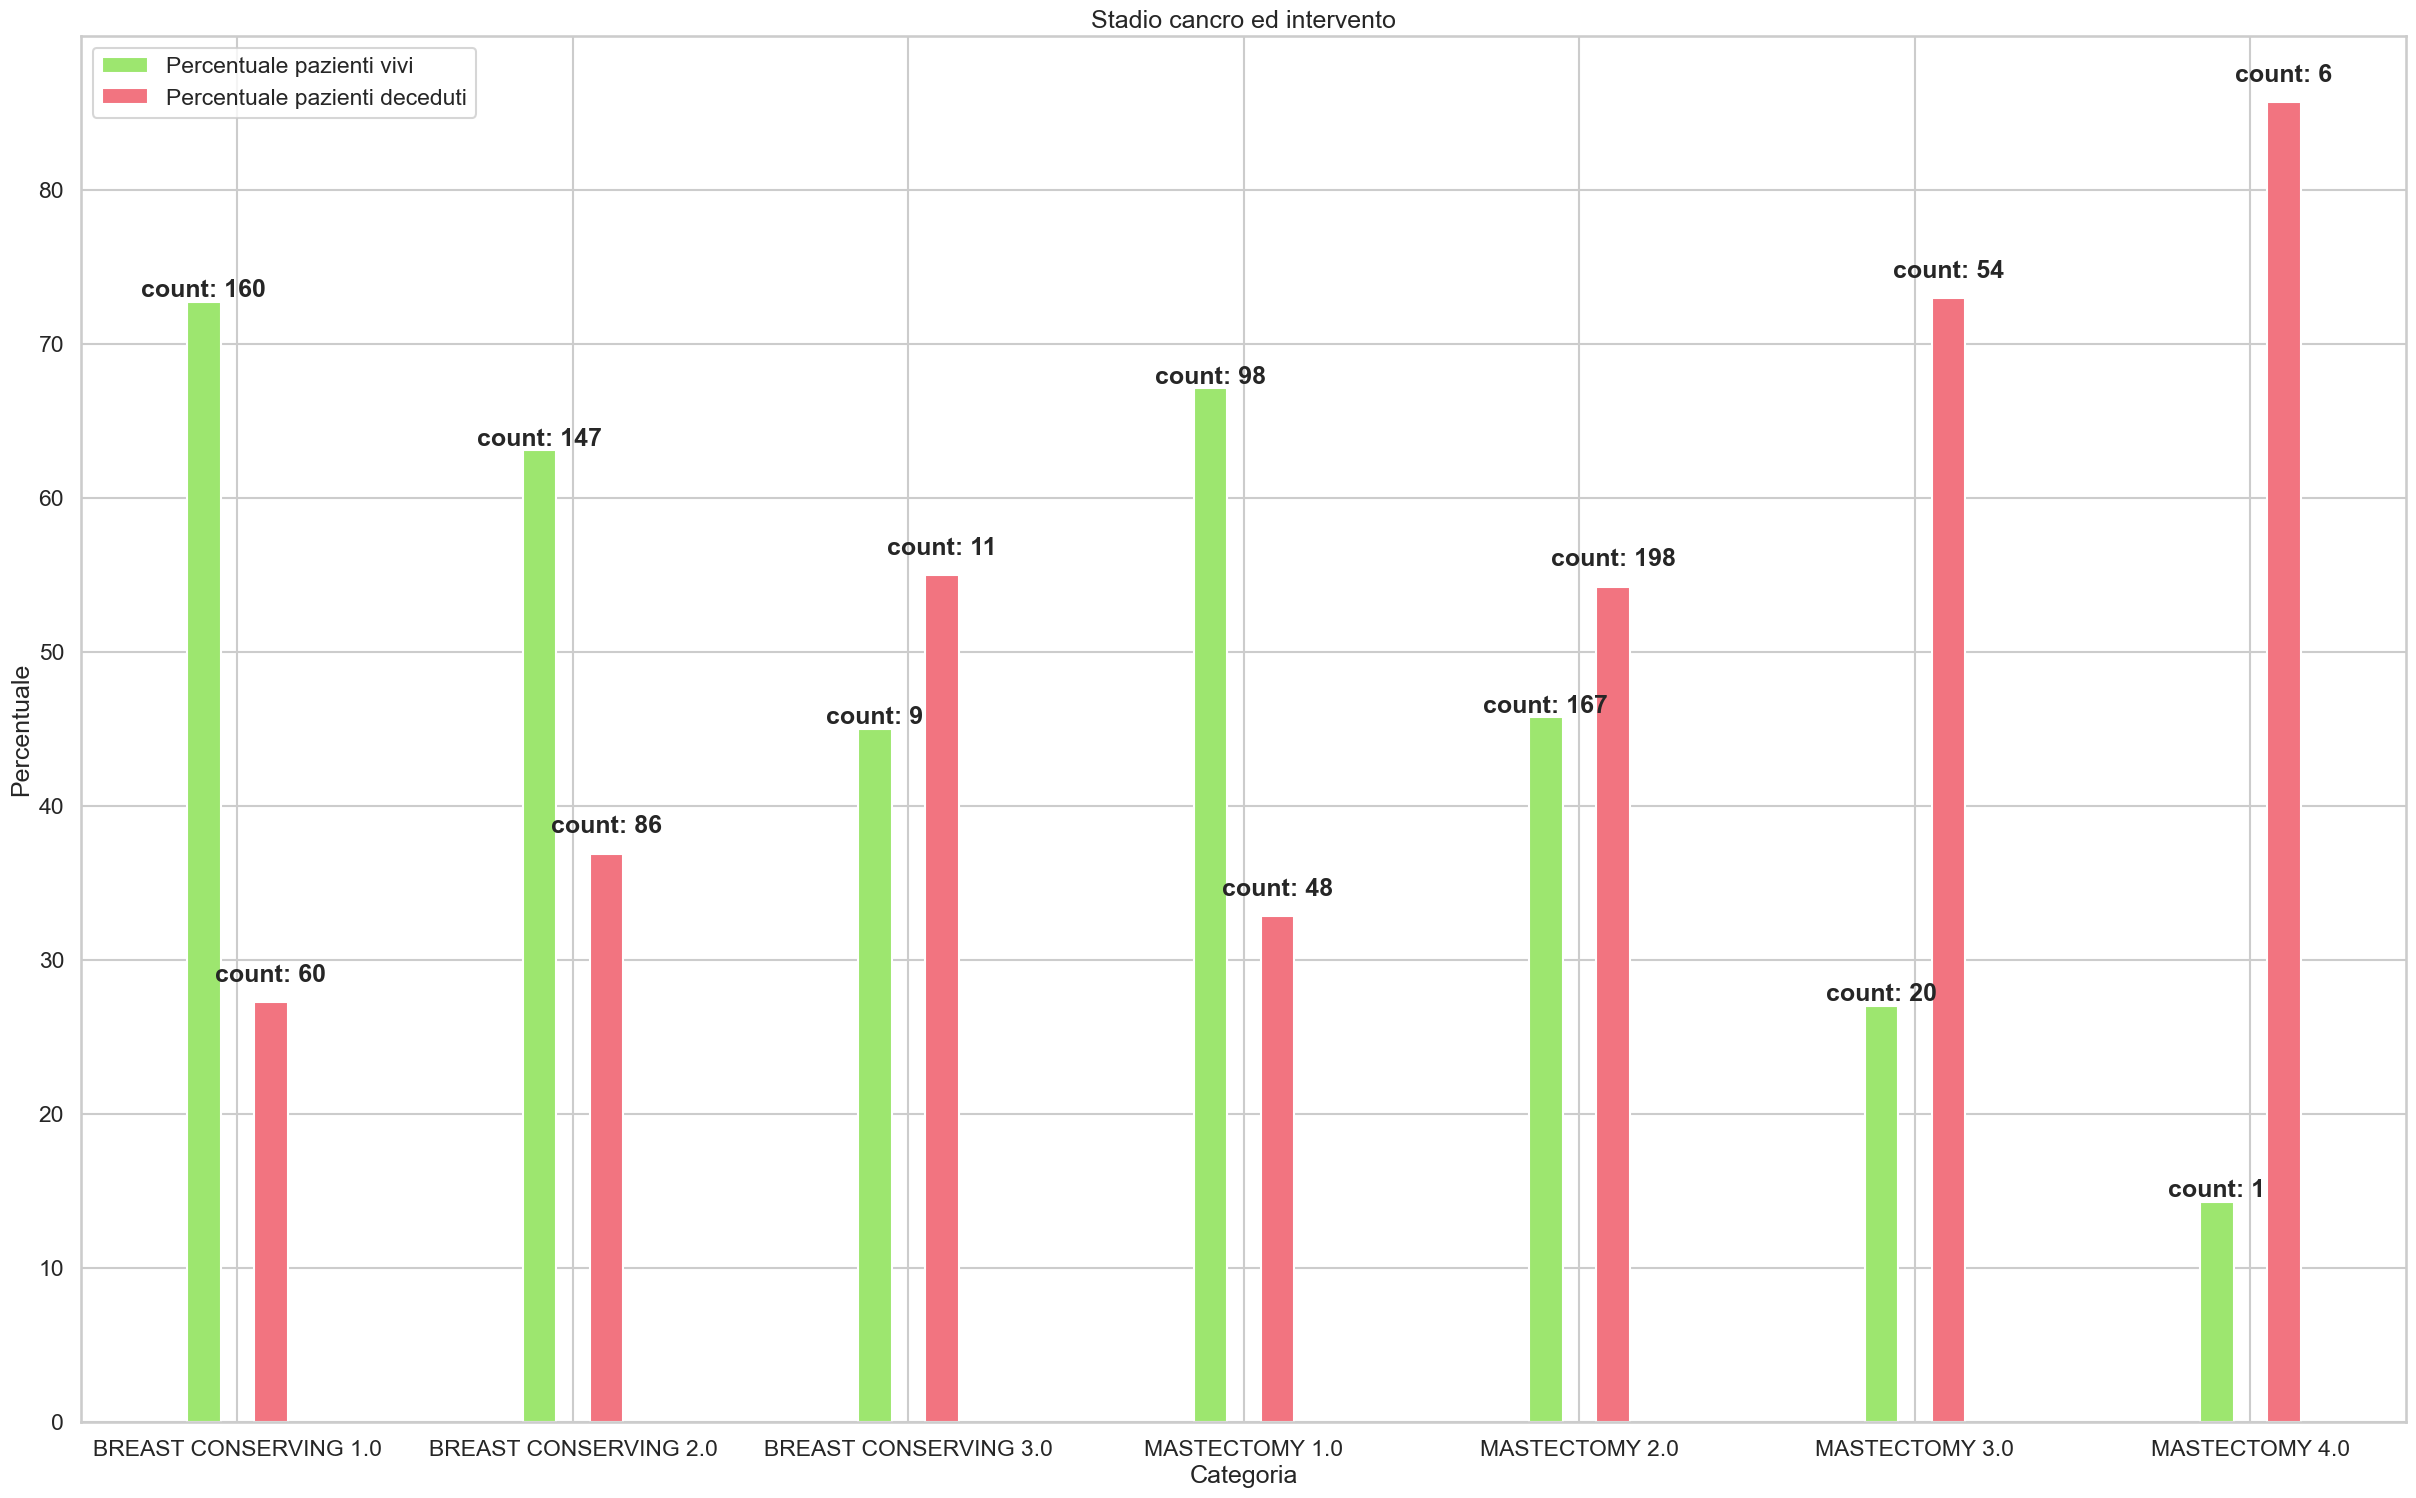

In [12]:
tasso_mortalità = []
n = []
m = []

for titolo, dataset in zip(os.listdir('Terapie'), lista_terapie):
    y = titolo[2:-4]
    value_counts = (dataset['death_from_cancer'].value_counts())
    conto_n = value_counts.get('Living', 0)
    conto_m = value_counts.get('Died of Disease', 0)
    totale = value_counts.sum()
    percentuale = ((value_counts / totale) * 100).round(2)
    
    percentuale_vivi = percentuale.get('Living', 0)
    percentuale_morti = percentuale.get('Died of Disease', 0)
    
    tupla = (percentuale_vivi, percentuale_morti)
    tasso_mortalità.append((y, tupla))
    n.append(conto_n)
    m.append(conto_m)
    
tasso_sopravvivenza = pd.DataFrame(tasso_mortalità, columns=['Terapia', 'Percentuale(v/m)'])
crea_grafico(tasso_sopravvivenza, "Stadio cancro ed intervento", n, m)

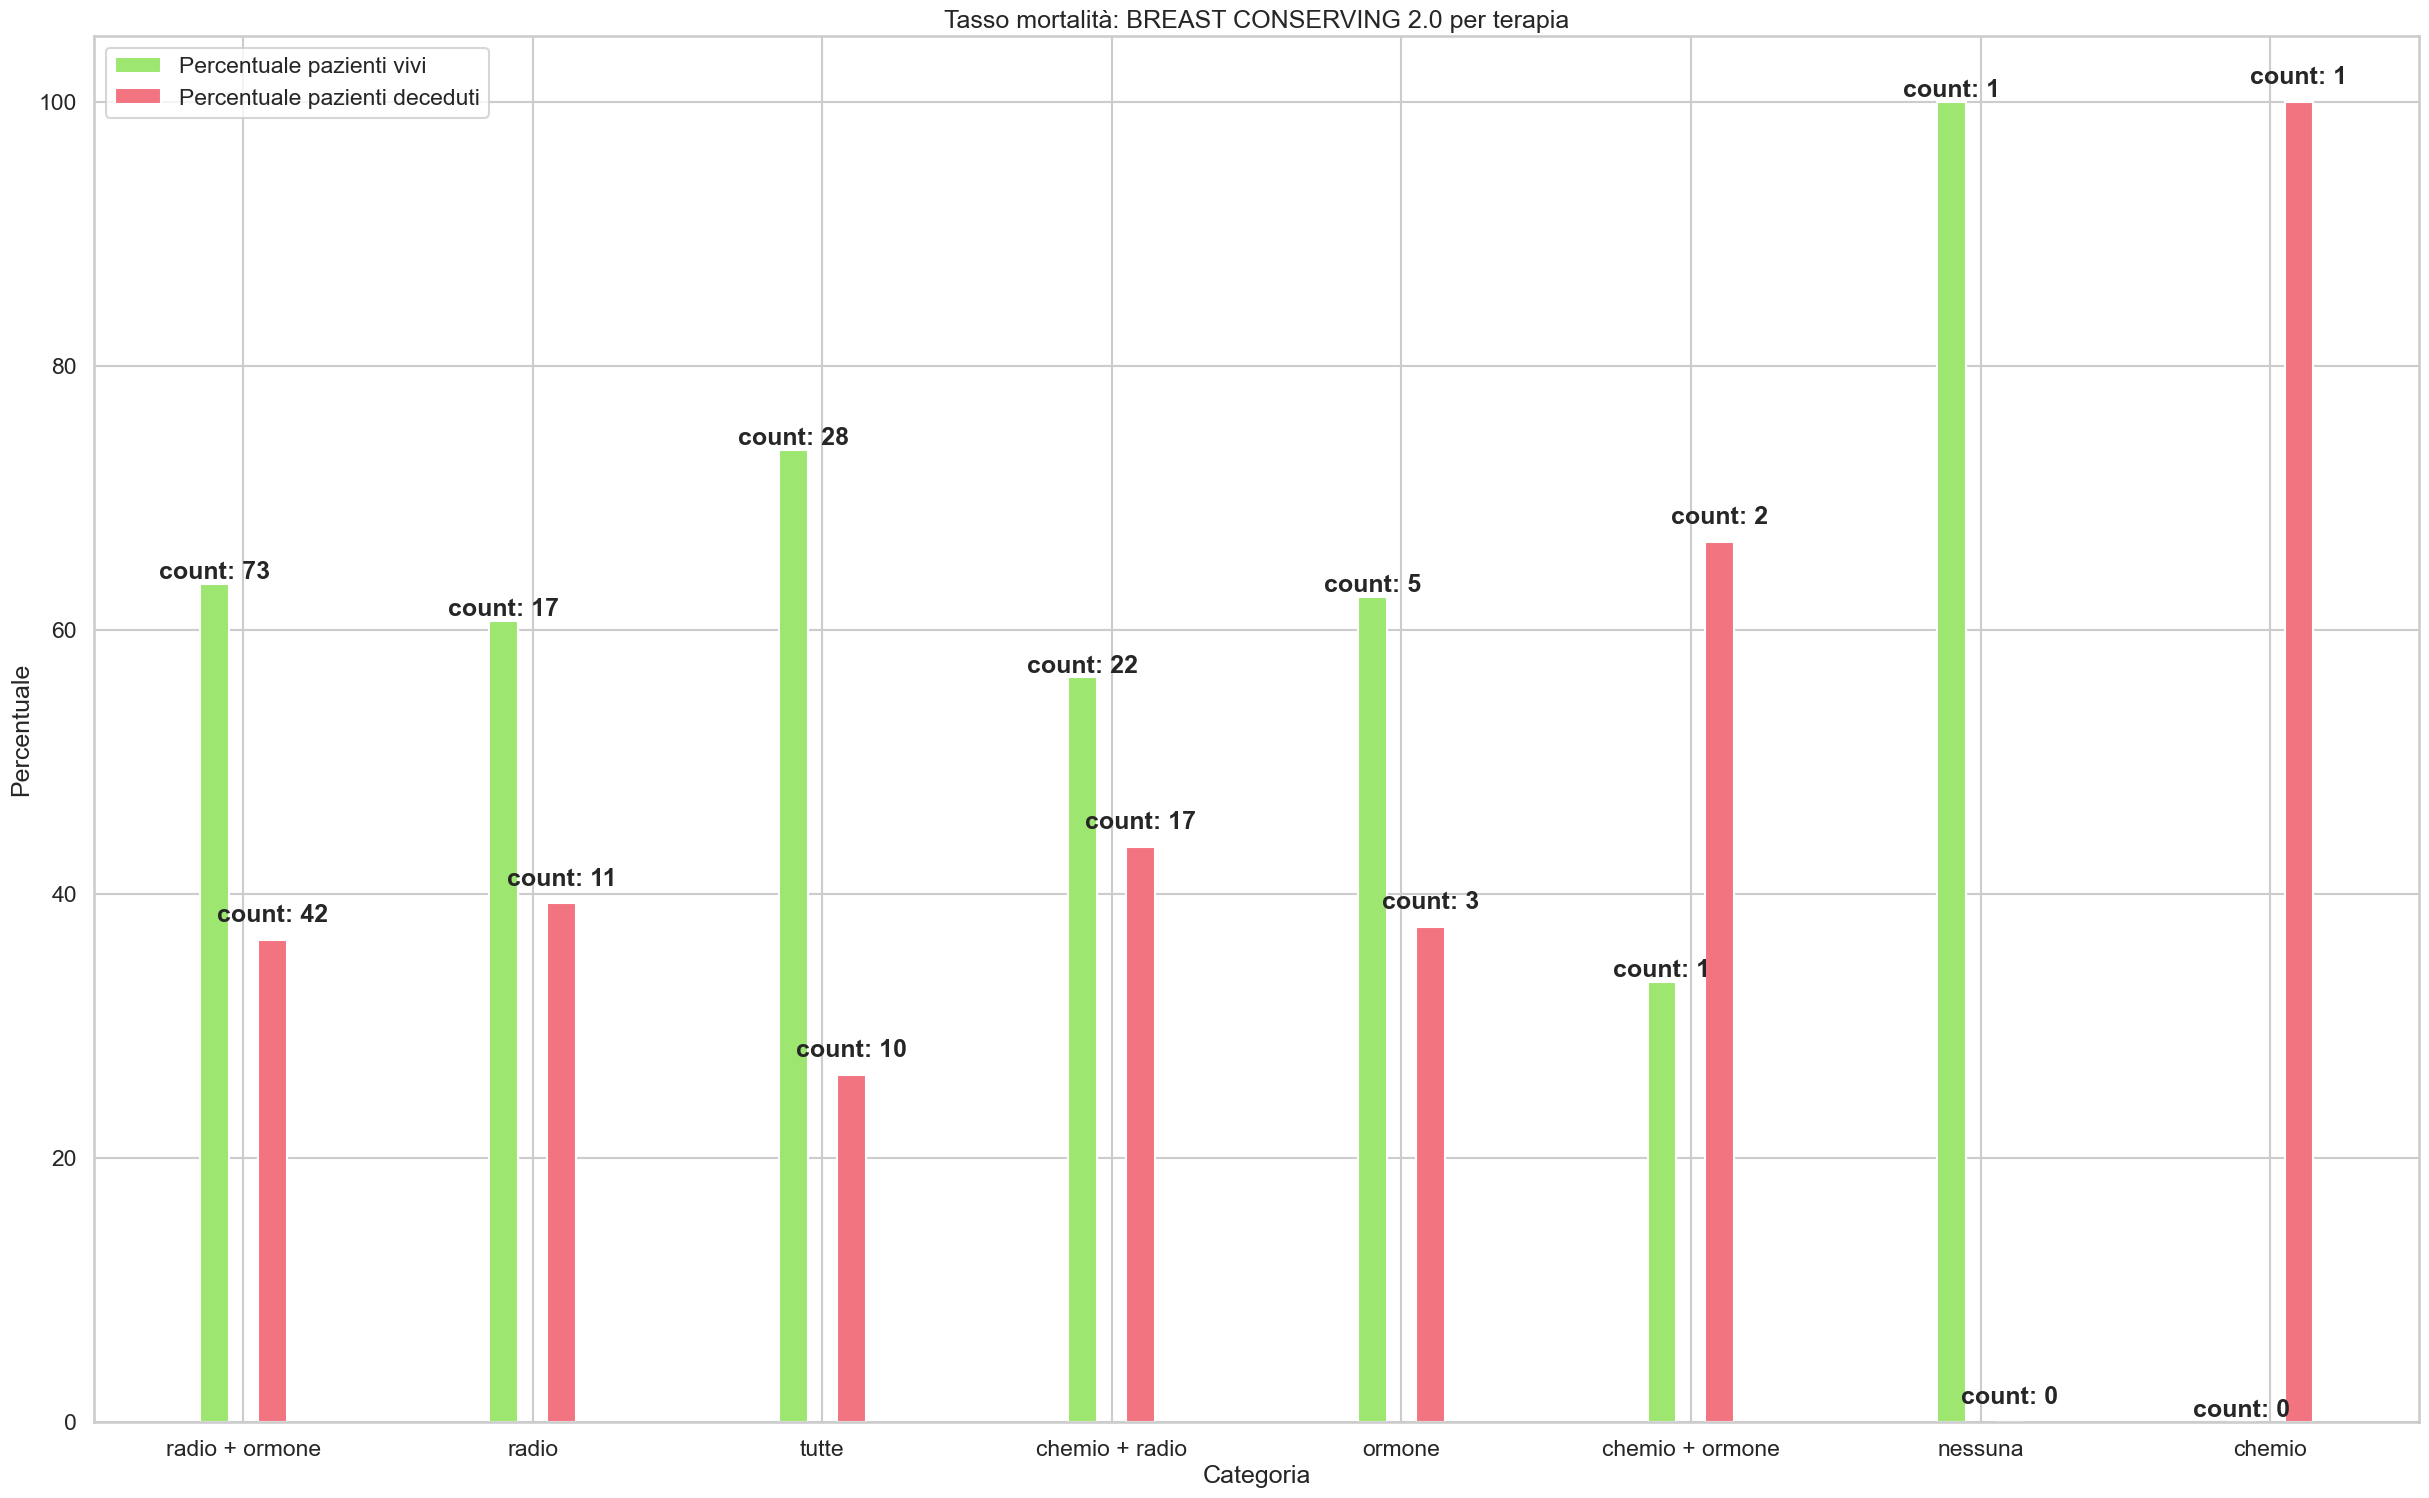

In [13]:
risultati = []

dataset = lista_terapie[1]
data = []
n = []
m = []

for terapia in dataset['Terapie'].unique():
    df_terapia = dataset[dataset['Terapie'] == terapia]
    
    value_counts = df_terapia['death_from_cancer'].value_counts()

    conto_n = value_counts.get('Living', 0)
    conto_m = value_counts.get('Died of Disease', 0)
    
    totale = value_counts.sum()
    
    percentuale = ((value_counts / totale) * 100).round(2)
    percentuale_vivi = percentuale.get('Living', 0)
    percentuale_morti = percentuale.get('Died of Disease', 0)
    
    tupla = (percentuale_vivi, percentuale_morti)

    # Mi servirà dopo per calcolarmi con che probabilità si verifica un evento
    conteggio = (conto_n + conto_m)

    # Inserisco anche 'dataset['Operation_Stage'].iloc[0]' per facilitarmi dopo il multi index in quanto andrò a fare le percentuali assolute
    risultati.append((dataset['Operation_Stage'].iloc[0], terapia, tupla, conteggio))

    data.append({'Terapia': terapia, 'Percentuale(v/m)': tupla})
    n.append(conto_n)
    m.append(conto_m)

grafico = pd.DataFrame(data)
crea_grafico(grafico, f'Tasso mortalità: {dataset['Operation_Stage'].iloc[0]} per terapia', n, m)

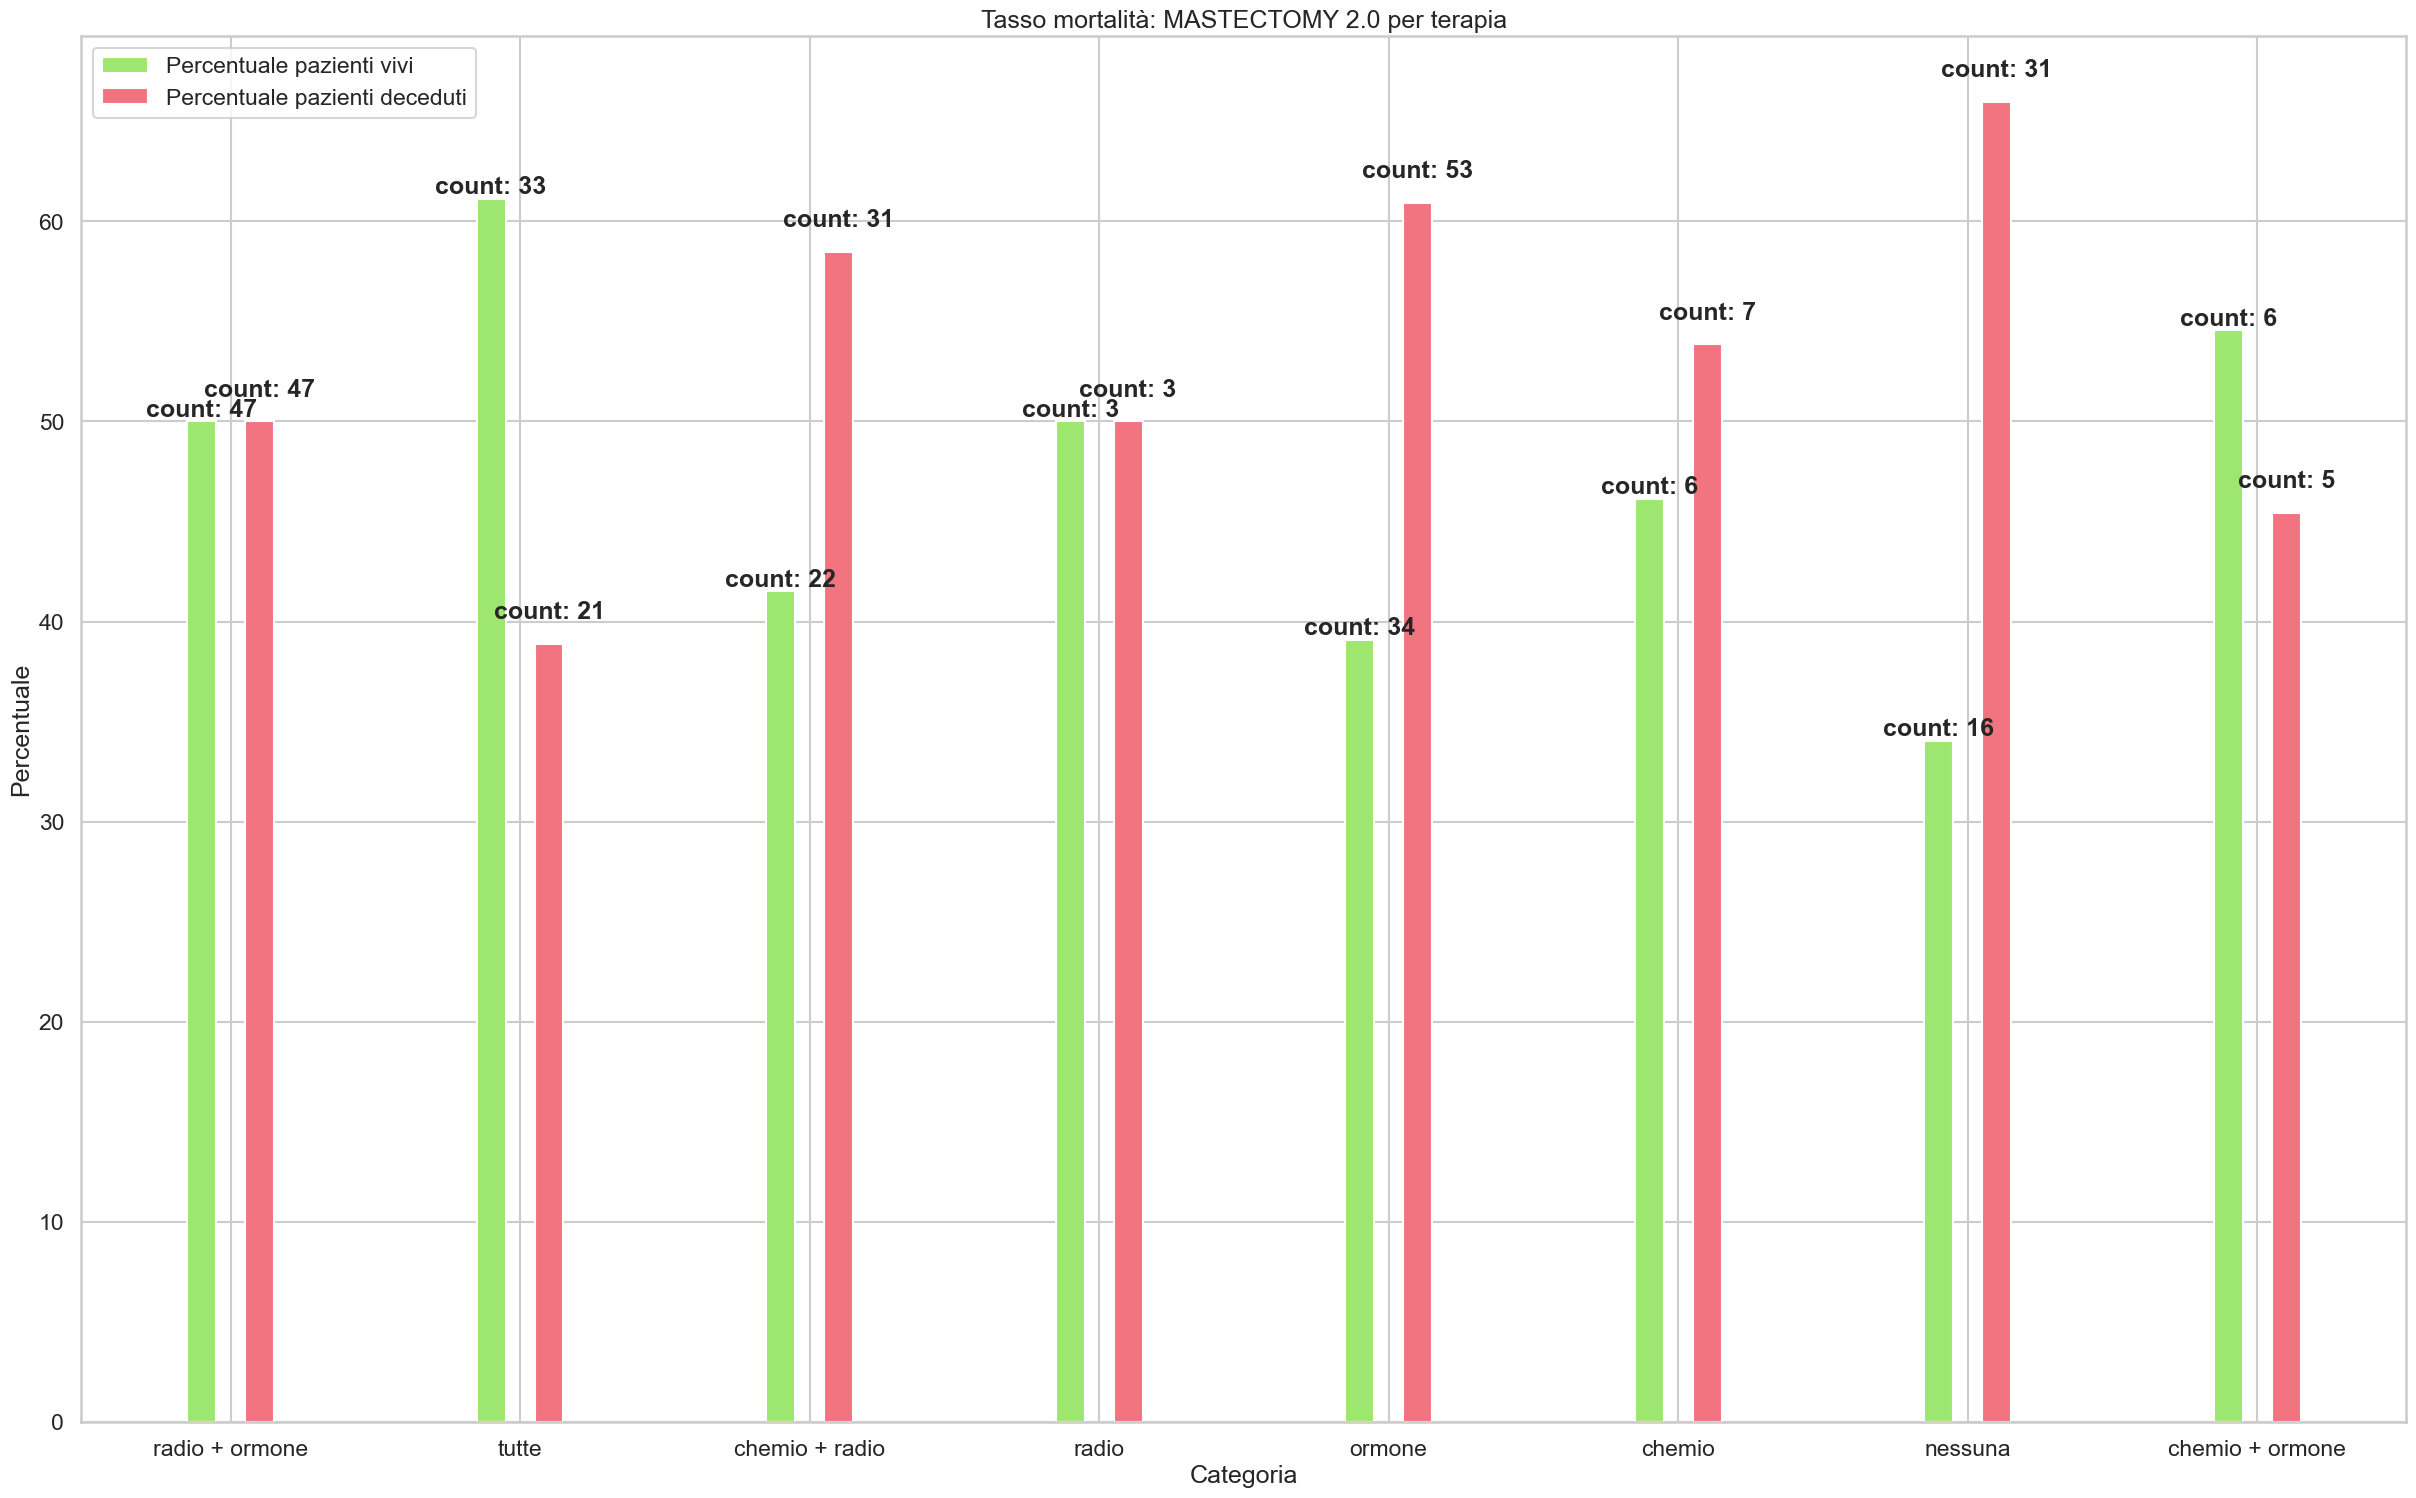

In [14]:
risultati = []

dataset = lista_terapie[4]
data = []
n = []
m = []

for terapia in dataset['Terapie'].unique():
    df_terapia = dataset[dataset['Terapie'] == terapia]
    
    value_counts = df_terapia['death_from_cancer'].value_counts()

    conto_n = value_counts.get('Living', 0)
    conto_m = value_counts.get('Died of Disease', 0)
    
    totale = value_counts.sum()
    
    percentuale = ((value_counts / totale) * 100).round(2)
    percentuale_vivi = percentuale.get('Living', 0)
    percentuale_morti = percentuale.get('Died of Disease', 0)
    
    tupla = (percentuale_vivi, percentuale_morti)

    # Mi servirà dopo per calcolarmi con che probabilità si verifica un evento
    conteggio = (conto_n + conto_m)

    # Inserisco anche 'dataset['Operation_Stage'].iloc[0]' per facilitarmi dopo il multi index in quanto andrò a fare le percentuali assolute
    risultati.append((dataset['Operation_Stage'].iloc[0], terapia, tupla, conteggio))

    data.append({'Terapia': terapia, 'Percentuale(v/m)': tupla})
    n.append(conto_n)
    m.append(conto_m)

grafico = pd.DataFrame(data)
crea_grafico(grafico, f'Tasso mortalità: {dataset['Operation_Stage'].iloc[0]} per terapia', n, m)

<center><b>Che combinazione di cure mi permette di sconfiggere il cancro il più velocemente possibile?</b></center>

Prendiamo in considerazione solo i dati delle persone vive

In [15]:
df_living = df_nuovo[df_nuovo['death_from_cancer'] == 'Living']
df_living

,age_at_diagnosis,overall_survival_months,death_from_cancer,tumor_size,COR_Terapie,Terapie,Operation_Stage
1,76.06,198.30,Living,20.0,"(0, 0, 1)",radio,BREAST CONSERVING 1.0
3,61.78,163.73,Living,15.0,"(0, 0, 1)",radio,BREAST CONSERVING 1.0
4,55.53,190.17,Living,15.0,"(0, 0, 1)",radio,BREAST CONSERVING 1.0
6,49.02,146.77,Living,20.0,"(0, 0, 1)",radio,BREAST CONSERVING 1.0
7,70.98,142.43,Living,9.0,"(0, 1, 1)",radio + ormone,BREAST CONSERVING 1.0
...,...,...,...,...,...,...,...
1041,61.99,133.73,Living,35.0,"(0, 1, 1)",radio + ormone,MASTECTOMY 3.0
1042,31.71,195.93,Living,99.0,"(1, 1, 1)",tutte,MASTECTOMY 3.0
1047,48.67,176.60,Living,50.0,"(1, 1, 1)",tutte,MASTECTOMY 3.0
1052,48.53,109.00,Living,27.0,"(1, 0, 1)",chemio + radio,MASTECTOMY 3.0


In [16]:
df_finale_BREAST_CONSERVING_2= df_living[(df_living['Operation_Stage'] == 'BREAST CONSERVING 2.0')]
df_finale_BREAST_CONSERVING_2

,age_at_diagnosis,overall_survival_months,death_from_cancer,tumor_size,COR_Terapie,Terapie,Operation_Stage
220,68.99,272.20,Living,20.0,"(0, 1, 1)",radio + ormone,BREAST CONSERVING 2.0
221,50.92,138.33,Living,17.0,"(0, 1, 1)",radio + ormone,BREAST CONSERVING 2.0
222,67.15,184.40,Living,21.0,"(0, 0, 1)",radio,BREAST CONSERVING 2.0
223,71.21,119.80,Living,21.0,"(0, 1, 1)",radio + ormone,BREAST CONSERVING 2.0
225,46.85,123.27,Living,24.0,"(1, 1, 1)",tutte,BREAST CONSERVING 2.0
...,...,...,...,...,...,...,...
443,75.55,168.27,Living,20.0,"(0, 1, 1)",radio + ormone,BREAST CONSERVING 2.0
444,71.05,39.43,Living,25.0,"(0, 1, 1)",radio + ormone,BREAST CONSERVING 2.0
448,48.47,65.87,Living,25.0,"(1, 0, 1)",chemio + radio,BREAST CONSERVING 2.0
450,56.45,60.67,Living,27.0,"(1, 0, 1)",chemio + radio,BREAST CONSERVING 2.0


In [17]:
df_finale_BREAST_CONSERVING_2 = df_finale_BREAST_CONSERVING_2[~df_finale_BREAST_CONSERVING_2['Terapie'].isin(['chemio + ormone', 'nessuna'])]
df_finale_BREAST_CONSERVING_2

,age_at_diagnosis,overall_survival_months,death_from_cancer,tumor_size,COR_Terapie,Terapie,Operation_Stage
220,68.99,272.20,Living,20.0,"(0, 1, 1)",radio + ormone,BREAST CONSERVING 2.0
221,50.92,138.33,Living,17.0,"(0, 1, 1)",radio + ormone,BREAST CONSERVING 2.0
222,67.15,184.40,Living,21.0,"(0, 0, 1)",radio,BREAST CONSERVING 2.0
223,71.21,119.80,Living,21.0,"(0, 1, 1)",radio + ormone,BREAST CONSERVING 2.0
225,46.85,123.27,Living,24.0,"(1, 1, 1)",tutte,BREAST CONSERVING 2.0
...,...,...,...,...,...,...,...
443,75.55,168.27,Living,20.0,"(0, 1, 1)",radio + ormone,BREAST CONSERVING 2.0
444,71.05,39.43,Living,25.0,"(0, 1, 1)",radio + ormone,BREAST CONSERVING 2.0
448,48.47,65.87,Living,25.0,"(1, 0, 1)",chemio + radio,BREAST CONSERVING 2.0
450,56.45,60.67,Living,27.0,"(1, 0, 1)",chemio + radio,BREAST CONSERVING 2.0


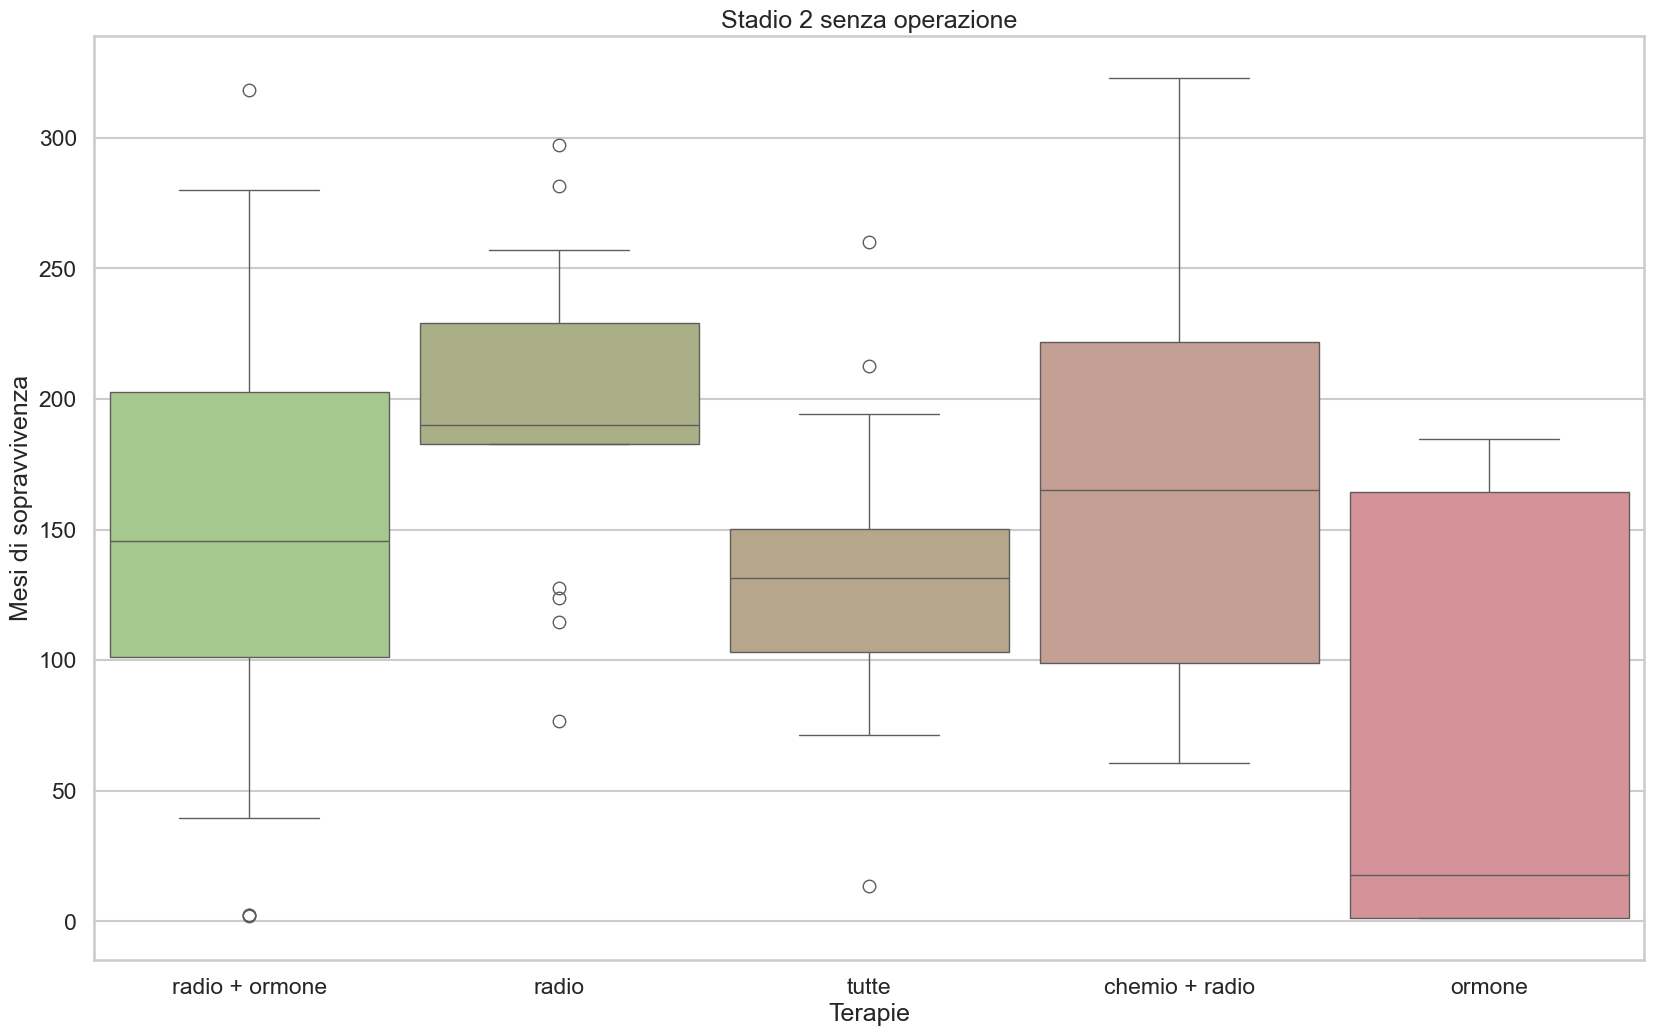

In [18]:
# Fare boxplot su df_età prendendo lo stadio tumorale e l'età
color = ['#9de66f', '#b8c275', '#c9ab78', '#db937c', '#f27480']

quartiles = df_finale_BREAST_CONSERVING_2.groupby("Terapie")["overall_survival_months"].describe()[["25%", "50%", "75%"]]

plt.figure(figsize=(20, 12))
a = sns.boxplot(data=df_finale_BREAST_CONSERVING_2, x='Terapie', y='overall_survival_months', hue='Terapie', legend=False, palette=color,
                saturation=0.5, width=1, gap=.1, whis=0.95)
plt.title(f'Stadio 2 senza operazione')
a.set_xlabel('Terapie')
a.set_ylabel('Mesi di sopravvivenza')

plt.show()

In [19]:
df_finale_MASTECTOMY_2= df_living[(df_living['Operation_Stage'] == 'MASTECTOMY 2.0')]
df_finale_MASTECTOMY_2

,age_at_diagnosis,overall_survival_months,death_from_cancer,tumor_size,COR_Terapie,Terapie,Operation_Stage
621,46.63,97.57,Living,28.0,"(1, 1, 1)",tutte,MASTECTOMY 2.0
622,78.41,131.13,Living,22.0,"(0, 1, 1)",radio + ormone,MASTECTOMY 2.0
624,72.69,143.17,Living,23.0,"(0, 0, 1)",radio,MASTECTOMY 2.0
625,58.25,167.50,Living,40.0,"(0, 1, 0)",ormone,MASTECTOMY 2.0
627,41.27,169.67,Living,15.0,"(1, 0, 0)",chemio,MASTECTOMY 2.0
...,...,...,...,...,...,...,...
979,38.90,94.23,Living,25.0,"(1, 1, 1)",tutte,MASTECTOMY 2.0
980,50.70,229.90,Living,35.0,"(0, 0, 0)",nessuna,MASTECTOMY 2.0
981,70.04,33.57,Living,30.0,"(0, 1, 1)",radio + ormone,MASTECTOMY 2.0
982,65.86,144.93,Living,14.0,"(0, 1, 1)",radio + ormone,MASTECTOMY 2.0


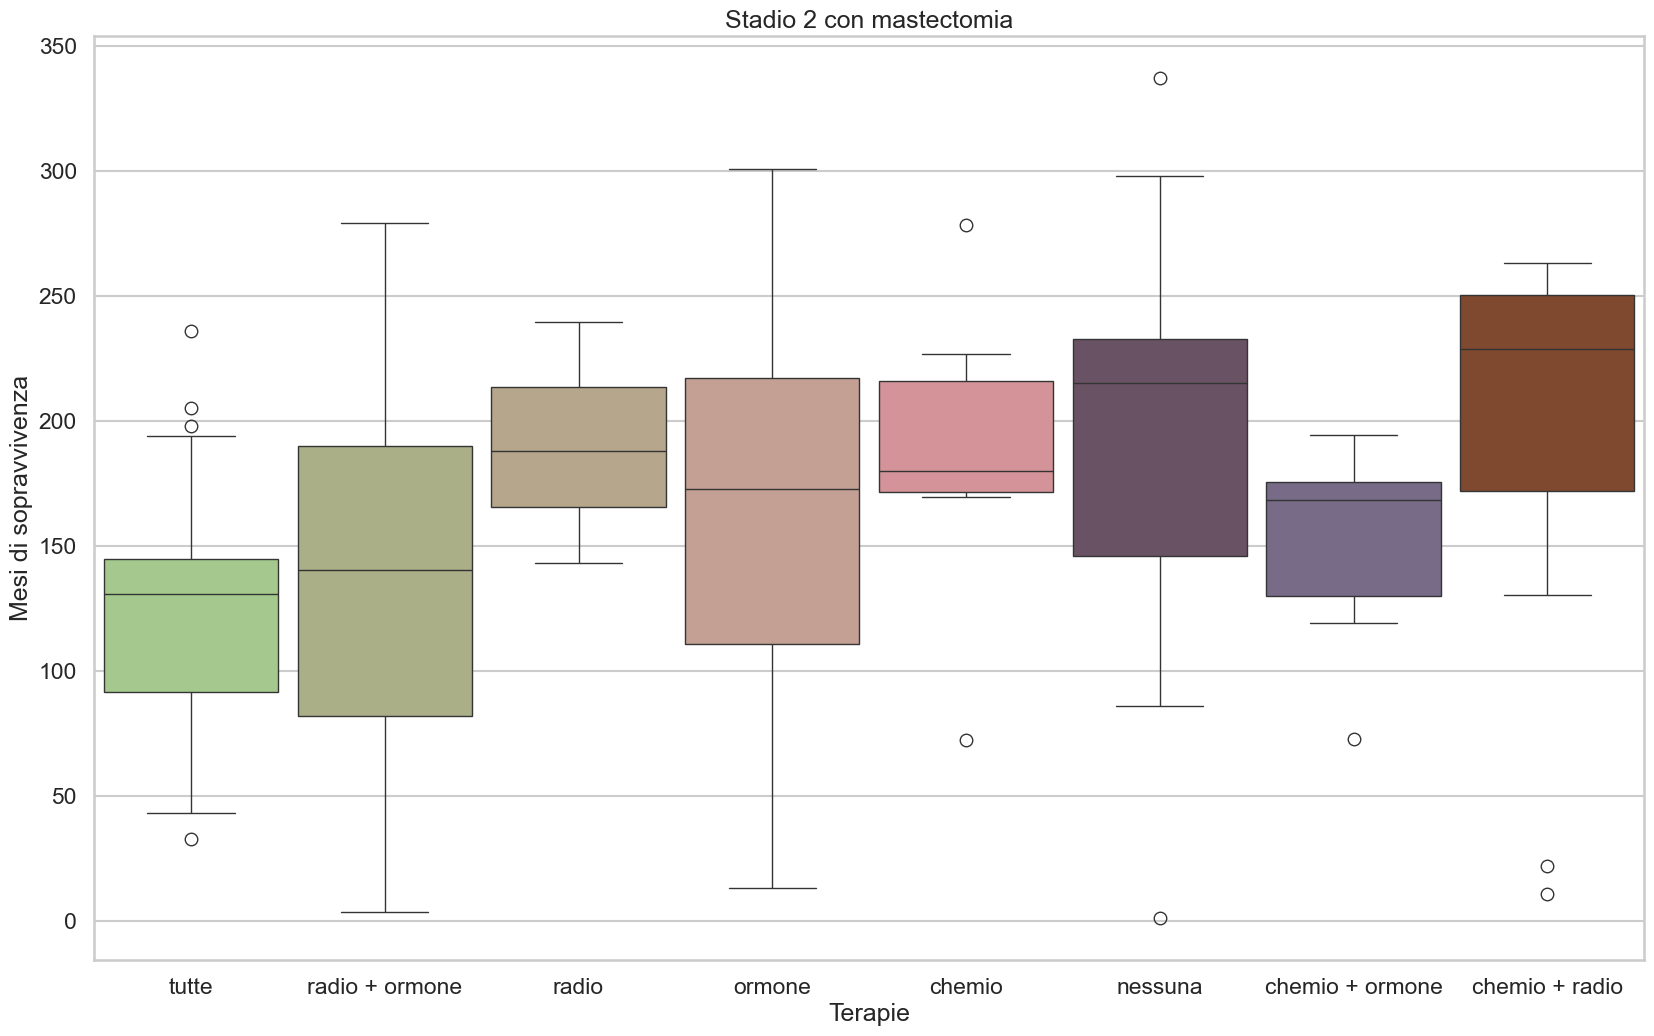

In [20]:
# Fare boxplot su df_età prendendo lo stadio tumorale e l'età
color = ['#9de66f', '#b8c275', '#c9ab78', '#db937c', '#f27480', '#754668', '#745C97', '#A63C06']

quartiles = df_finale_MASTECTOMY_2.groupby("Terapie")["overall_survival_months"].describe()[["25%", "50%", "75%"]]

plt.figure(figsize=(20, 12))
a = sns.boxplot(data=df_finale_MASTECTOMY_2, x='Terapie', y='overall_survival_months', hue='Terapie', legend=False, palette=color,
                saturation=0.5, width=1, gap=.1, whis=0.95)
plt.title(f'Stadio 2 con mastectomia')
a.set_xlabel('Terapie')
a.set_ylabel('Mesi di sopravvivenza')

plt.show()

<center><b>Conclusioni</b></center>

<b>PREVENZIONE</b></br>
I trend visti mostrano che prima viene diagnosticato un tumore e più possibilità ci sono che sia piccolo.</br>
Sembra che combinare l'ormoneterapia con radioterapia si ababstanza efficace nel combattere gli stadi 2

<b>Premessa</b></br>
Non essendo esperto di dominio, ho preso in considerazione solo alcune colonne del dataset

<h5><center>Caratteristiche dataset</center></h5>
<body>
    <table border="1">
        <tr>
            <td><b>Name</b></td><td><b>Type</b></td><td><b>Description</b></td>
        </tr>
        <tr>
            <td>patient_id</td><td>object</td><td>ID Paziente</td>
        </tr>
        <tr>
            <td>age_at_diagnosis</td><td>float</td><td>Età del paziente al momento della diagnosi</td>
        </tr>
        <tr>
            <td>type_of_breast_surgery</td><td>object</td><td>
                1- mastectomia
                2- conservazione seno
        </tr>
        <tr>
            <td>chemotherapy</td><td>int</td><td>Se il paziente ha ricevuto la chemioterapia</td>
        </tr>
        <tr>
            <td>hormone_therapy</td><td>int</td><td>Se il paziente ha ricevuto un trattamento ormonale</td>
        </tr>
        <tr>
            <td>overall_survival_months</td><td>float</td><td>Durata dal momento dell'intervento fino al decesso</td>
        </tr>
        <tr>
            <td>overall_survival</td><td>object</td><td>Se il paziente è vivo o deceduto.</td>
        </tr>
            <td>radio_therapy</td><td>int</td><td>Se il paziente ha ricevuto la radioterapia</td>
        </tr>
        <tr>
            <td>tumor_size</td><td>float</td><td>Dimensioni del tumore</td>
        </tr>
        <tr>
            <td>tumor_stage</td><td>float</td><td>Stadio del cancro</td>
        </tr>
        <tr>
            <td>death_from_cancer</td><td>int</td><td>Se la morte del paziente è stata dovuta al cancro</td>
        </tr>
    </table>
</body>

<h5><center>Ringraziamenti</center></h5>
Set di dati sul cancro al seno (METABRIC, Nature 2012 e Nat Commun 2016) in CBioPortal</br>
Studio METABRIC</br>
Cerami et al. The cBio Cancer Genomics Portal: una piattaforma aperta per esplorare dati di genomica del cancro multidimensionale. Cancer Discovery. Maggio 2012 2.</br>
Gao et al. Analisi integrativa di profili clinici e genomica del cancro complessi utilizzando cBioPortal. Sci. Signal. 6, pl1 (2013).